In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii, fits
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
from astropy.coordinates import Angle
#import splat
%matplotlib inline

In [48]:
#40 pc sample
#: J/MNRAS/499/1890

#white dwars within 21pc
#J/MNRAS/449/3966

Vizier.ROW_LIMIT = -1 
catalogs = Vizier.get_catalogs('J/MNRAS/449/3966')
catalogs1 = Vizier.get_catalogs('J/MNRAS/499/1890')
#catalogs2=

In [58]:
catalogs1[-1]

System,WDJ,GaiaDR2,RA_ICRS,DE_ICRS,pmRA,pmDE,skySep,radSep,deltapm1,deltapm2,Type,Note,SimbadName,_RA.icrs,_DE.icrs
,,,deg,deg,mas / yr,mas / yr,pc,pc,mas / yr,km / s,,,,deg,deg
int16,str22,int64,float64,float64,float64,float64,float64,float32,float64,float32,str6,str3,str28,float64,float64
0,WDJ001324.45+543757.64,420531621029108608,3.35766666667,54.63526111111,776.760,600.137,--,--,--,--,WDMS,1,Gaia DR2 420531621029108608,3.35188869540,54.63267705041
0,STAR,420542276842182784,3.20145833333,54.66521944444,777.205,603.789,0.0535000003874302,0.1039,3.700,0.560,WDMS,1,Gaia DR2 420542276842182784,3.19567279149,54.66261965954
1,WDJ002116.21+253134.45,2855386170682263424,5.31779166667,25.52627222222,53.100,8.399,--,--,--,--,WDMS,1,Gaia DR2 2855386170682263424,5.31753831114,25.52623605964
1,STAR,2855386174976559488,5.31695833333,25.52429722222,50.958,9.547,0.00100000004749745,0.0795,2.400,0.320,WDMS,1,Gaia DR2 2855386174976559488,5.31671520192,25.52425611688
2,WDJ002450.37+683446.85,529594417061837824,6.21470833333,68.57978055556,411.626,23.072,--,--,--,--,WDMS,,Gaia DR2 529594417061837824,6.20985552687,68.57968114791
2,STAR,529594417069407744,6.21408333333,68.57851388889,409.790,31.157,0.0007999999797903,0.5473,8.300,1.420,WDMS,,Gaia DR2 529594417069407744,6.20925245184,68.57837967145
3,WDJ004122.04+555008.35,418491412783587200,10.34425000000,55.83535000000,316.387,-69.999,--,--,--,--,WDMS,1,Gaia DR2 418491412783587200,10.34182425588,55.83565136072
3,STAR,418491408481398272,10.33929166667,55.83424444444,324.503,-73.233,0.00120000005699694,0.1162,8.700,0.950,WDMS,1,Gaia DR2 418491408481398272,10.33680376689,55.83455972810


In [31]:
params=catalogs[3].to_pandas()#stellar parameters
kinemas=catalogs[1].to_pandas()

In [35]:
merged=kinemas.merge(params, on='Name')

In [72]:
OBS_KIN=(np.array([[10.29496386],
        [-0.15391868],
        [-1.28539   ]]),
 np.array([[0.06680341],
        [0.03215594],
        [0.02572773]]))

Text(0, 0.5, 'Age (Gyr)')

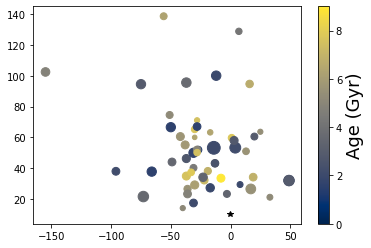

In [85]:
fig, ax=plt.subplots()

c=ax.scatter( merged.Vvel, (merged.Uvel**2+merged.Wvel**2)**0.5,  merged.Dist, \
           c=merged.tcoolCO, vmin=0, vmax=9., cmap='cividis')
cbar=plt.colorbar(c, ticks=[0, 2, 4, 6, 8])
ax.errorbar(OBS_KIN[0][1], (OBS_KIN[0][0]**2+  OBS_KIN[0][-1]**2)**0.5, 
            fmt='*', c='k')
cbar.ax.set_ylabel('Age (Gyr)', fontsize=18)